In [35]:
def bump(x,x0,r):
    np.seterr(all = 'ignore')
    d = np.linalg.norm((x - x0),axis = 1)
    b = np.zeros((d.shape))
    indices = np.where(d<r) 
    a = 1.0-((d[indices]/r)**2)
    b[indices] = np.exp(-1.0/a)
    return b
def bump_der(x,x0,r):
    np.seterr(all = 'ignore')
    d = np.array([np.linalg.norm((x - x0),axis = 1),]*len(x[0])).T
    d2= (x - x0)
    gr = np.zeros((d2.shape))
    indices = np.where(d<1.0) 
    a = 1.0-(d[indices]**2)
    gr[indices] = ((-2.0*d2[indices])/(a**2)) * np.exp(-1.0/a)
    return gr

In [36]:
import numpy as np
import matplotlib.pyplot as plt

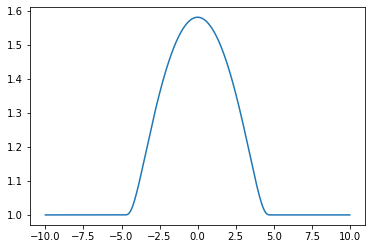

In [37]:
x = np.empty((1000,1))
x[:,0] = np.linspace(-10,10,1000)
f = 1.0/(1.0-bump(x,0,5))
#for i in range(10):
#    f = f * bump(x,(np.random.rand()-1.0)*10.0,5)
#    print((np.random.rand()-1.0)*10.0)
plt.plot(x,f)

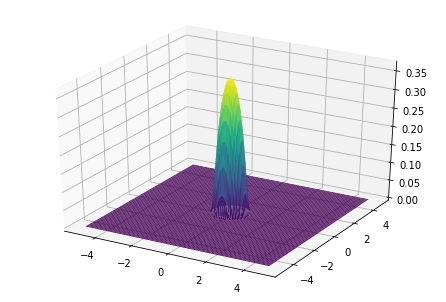

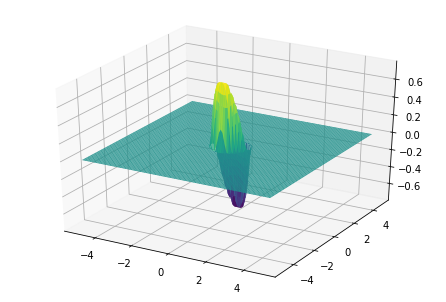

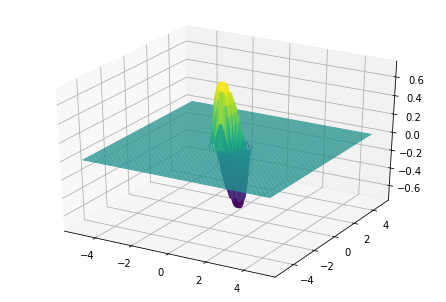

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
x = np.empty((len(X)**2,2))
x0= np.zeros((2))
index = 0 
for i in range(len(X)):
    for j in range(len(Y)):
        x[index,0] = X[i,j]
        x[index,1] = Y[i,j]
        index += 1
b = bump(x,x0,1.0)
der = bump_der(x,x0,1.0)
B = np.empty((X.shape))
D = np.empty((X.shape))
index = 0 
for i in range(len(X)):
    for j in range(len(Y)):
        B[i,j] = b[index]
        D[i,j] = der[index,1]
        index += 1

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, B, rstride=1, cstride=1, cmap=cm.viridis)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, D , rstride=1, cstride=1, cmap=cm.viridis)
plt.show()
fig = plt.figure()
ax = Axes3D(fig)
gx,gy = np.gradient(B,0.1,0.1)
ax.plot_surface(X, Y, gx, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()